## Medical Cost Prediction Project
This notebook demonstrates the  process of building a machine learning model to predict medical insurance costs based on patient data.

__Project Overview__

- Goal: Predict the medical insurance charges for individuals using features such as age, BMI, number of children, sex, smoking status, and region.


In [2]:
# import the packages
%pip install numpy pandas matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Load the dataset 
df = pd.read_csv("medical_insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Visualizations of the data and interpret

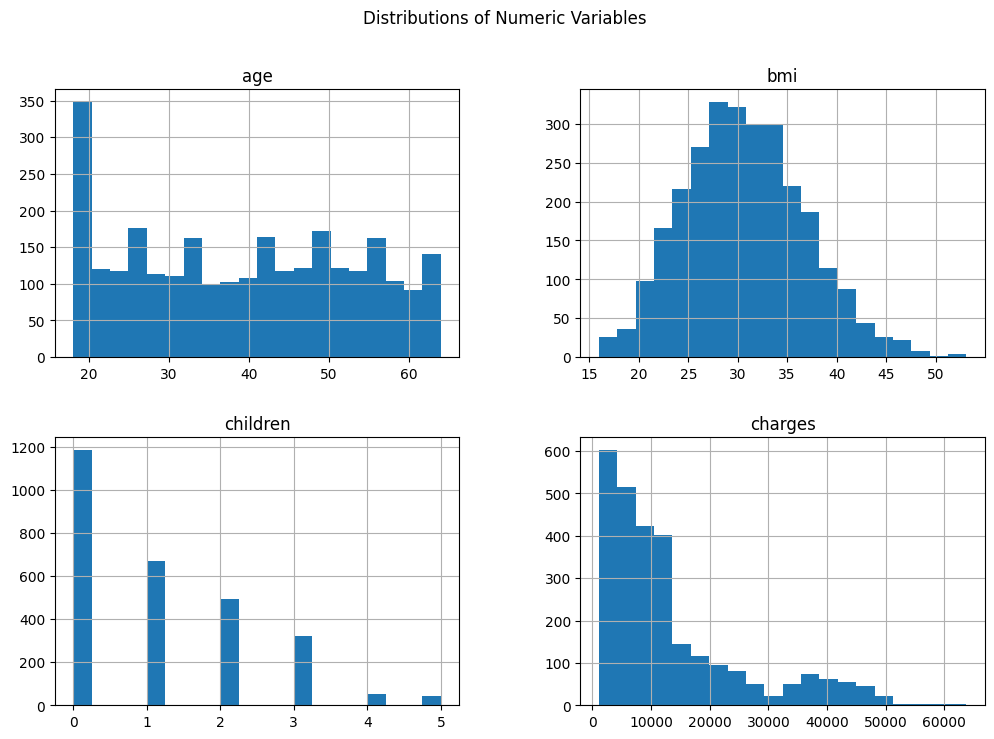

In [4]:
#Histograms for age, bmi, children, and charges
numeric_cols = ['age', 'bmi', 'children', 'charges']
df[numeric_cols].hist(bins=20, figsize=(12,8))
plt.suptitle('Distributions of Numeric Variables')
plt.show()


__Interpretation of the histograms__
- The BMI distribution is approximately normal, centered around 30. Most values fall between 20 and 40, with very few extreme values.
- The majority of individuals have 0 children, with the count decreasing as the number of children increases. Very few have 4 or 5 children.
-The distribution is right-skewed . Most people pay lower insurance charges, but a small number pay very high amounts.

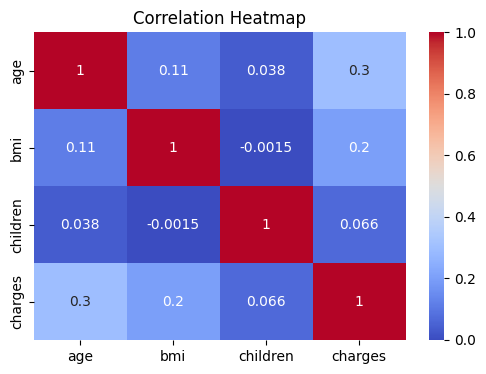

In [5]:
#Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

__Interpretation of the histograms__
- The strongest relationship is between age and charges (0.3), meaning older people tend to have higher insurance costs.
- BMI also has a weak positive relationship with charges (0.2), so higher BMI is associated with higher costs.

## Feature Engineering: Dropping and Weighing Columns
Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy.

__In this case:__

- Keeping all tables as they are all contributing in predicting charges.

In [6]:
# converting to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
df = pd.get_dummies(df, columns=['region'], drop_first=True)



In [7]:
print(df.head())

   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    1  27.900         0       1  16884.92400             False   
1   18    0  33.770         1       0   1725.55230             False   
2   28    0  33.000         3       0   4449.46200             False   
3   33    0  22.705         0       0  21984.47061              True   
4   32    0  28.880         0       0   3866.85520              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


## Standardize the data
Standardization rescales features to have a mean of 0 and a standard deviation of 1.

In [8]:
from sklearn.preprocessing import StandardScaler

cols_to_standardize = ['age', 'bmi', 'children']  

scaler = StandardScaler()
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])

## Optimization Using Gradient Descent: Linear Regression

## Linear Regression with scikit-learn

In this section, used the `LinearRegression` class from scikit-learn to fit a linear regression model to the medical insurance dataset. This method is highly efficient and sets a standard for comparison with our manual implementation.

__Variables__
- X_train: Features for training the model
- X_test: Features for testing the model 
- y_train: Target values for training.
- y_test: Target values for testing.
- R² Score: Measures how well the model explains the variance in medical costs.
- MSE: Measures the average squared difference between predicted and actual costs.

In [9]:
from sklearn.model_selection import train_test_split

# Prepare features and target
X = df.drop('charges', axis=1)
y = df['charges']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate
print("scikit-learn LinearRegression")
print("Train R^2:", lr.score(X_train, y_train))
print("Test R^2:", lr.score(X_test, y_test))

scikit-learn LinearRegression
Train R^2: 0.7536150843902418
Test R^2: 0.73981661775643


/Users/jade/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jade/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jade/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jade/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jade/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jade/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: i

## Linear Regression with Manual Gradient Descent (NumPy)

Here, implemented linear regression from scratch using gradient descent and NumPy. 

In [11]:
from sklearn.preprocessing import StandardScaler


# Remove constant columns (all zeros or all ones)
constant_cols = [col for col in X.columns if (X[col] == 0).all() or (X[col] == 1).all()]
if constant_cols:
    print('Dropping constant columns:', constant_cols)
    X = X.drop(columns=constant_cols)

# Feature scaling 
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Normalize the target variable
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Add bias column and ensure float type
X_np = np.c_[np.ones(X_scaled.shape[0]), X_scaled].astype(float)
y_np = y_scaled.reshape(-1, 1).astype(float)

# Check for NaNs or infs
print("NaNs in X:", np.isnan(X_np).sum(), "Infs in X:", np.isinf(X_np).sum())
print("NaNs in y:", np.isnan(y_np).sum(), "Infs in y:", np.isinf(y_np).sum())

# Train-test split
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# Gradient Descent Parameters
alpha = 0.01 
n_iter = 1000
m, n = X_train_np.shape
theta = np.zeros((n, 1), dtype=float)

# Gradient Descent Loop 
for i in range(n_iter):
    gradients = 2/m * X_train_np.T @ (X_train_np @ theta - y_train_np)
    theta -= alpha * gradients
    if i % 100 == 0:
        loss = np.mean((X_train_np @ theta - y_train_np) ** 2)
        print(f"Iteration {i}, Loss: {loss}")

# Predictions (inverse transform to get back to original scale)
y_pred_train_scaled = X_train_np @ theta
y_pred_test_scaled = X_test_np @ theta

# Fix: pass 2D arrays to inverse_transform, then flatten
y_pred_train = scaler_y.inverse_transform(y_pred_train_scaled).flatten()
y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled).flatten()
y_train_orig = scaler_y.inverse_transform(y_train_np).flatten()
y_test_orig = scaler_y.inverse_transform(y_test_np).flatten()

# R^2 Score Function
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

print("\nManual Gradient Descent Linear Regression")
print("Train R^2:", r2_score(y_train_orig, y_pred_train))
print("Test R^2:", r2_score(y_test_orig, y_pred_test))

NaNs in X: 0 Infs in X: 0
NaNs in y: 0 Infs in y: 0
Iteration 0, Loss: 0.9593336264683644
Iteration 100, Loss: 0.25770885503550806
Iteration 200, Loss: 0.2442662661830342
Iteration 300, Loss: 0.2438777182010288
Iteration 400, Loss: 0.24384353769108236
Iteration 500, Loss: 0.24383553372571154
Iteration 600, Loss: 0.2438332631835254
Iteration 700, Loss: 0.24383260659635433
Iteration 800, Loss: 0.24383241638539938
Iteration 900, Loss: 0.24383236127228064

Manual Gradient Descent Linear Regression
Train R^2: 0.753615077725182
Test R^2: 0.739817899841003


/var/folders/dc/6rtlztbj1tq0t4yb63tgwm8w0000gn/T/ipykernel_17091/2846527060.py:37: RuntimeWarning: divide by zero encountered in matmul
  gradients = 2/m * X_train_np.T @ (X_train_np @ theta - y_train_np)
/var/folders/dc/6rtlztbj1tq0t4yb63tgwm8w0000gn/T/ipykernel_17091/2846527060.py:37: RuntimeWarning: overflow encountered in matmul
  gradients = 2/m * X_train_np.T @ (X_train_np @ theta - y_train_np)
/var/folders/dc/6rtlztbj1tq0t4yb63tgwm8w0000gn/T/ipykernel_17091/2846527060.py:37: RuntimeWarning: invalid value encountered in matmul
  gradients = 2/m * X_train_np.T @ (X_train_np @ theta - y_train_np)
/var/folders/dc/6rtlztbj1tq0t4yb63tgwm8w0000gn/T/ipykernel_17091/2846527060.py:40: RuntimeWarning: divide by zero encountered in matmul
  loss = np.mean((X_train_np @ theta - y_train_np) ** 2)
/var/folders/dc/6rtlztbj1tq0t4yb63tgwm8w0000gn/T/ipykernel_17091/2846527060.py:40: RuntimeWarning: overflow encountered in matmul
  loss = np.mean((X_train_np @ theta - y_train_np) ** 2)
/var/folders


__Both the scikit-learn and manual gradient descent implementations achieve similar R² scores, indicating that the manual approach is correct.__


## Loss Curve for Train and Test Data

The plot below shows the mean squared error (loss) for both the training and test datasets at each iteration of manual gradient descent. 

- **Train Loss:** Indicates how well the model is fitting the training data as learning progresses.
- **Test Loss:** Indicates how well the model generalizes to unseen data.



/var/folders/dc/6rtlztbj1tq0t4yb63tgwm8w0000gn/T/ipykernel_17091/4168813056.py:10: RuntimeWarning: divide by zero encountered in matmul
  gradients = 2/m * X_train_np.T @ (X_train_np @ theta - y_train_np)
/var/folders/dc/6rtlztbj1tq0t4yb63tgwm8w0000gn/T/ipykernel_17091/4168813056.py:10: RuntimeWarning: overflow encountered in matmul
  gradients = 2/m * X_train_np.T @ (X_train_np @ theta - y_train_np)
/var/folders/dc/6rtlztbj1tq0t4yb63tgwm8w0000gn/T/ipykernel_17091/4168813056.py:10: RuntimeWarning: invalid value encountered in matmul
  gradients = 2/m * X_train_np.T @ (X_train_np @ theta - y_train_np)
/var/folders/dc/6rtlztbj1tq0t4yb63tgwm8w0000gn/T/ipykernel_17091/4168813056.py:14: RuntimeWarning: divide by zero encountered in matmul
  train_loss = np.mean((X_train_np @ theta - y_train_np) ** 2)
/var/folders/dc/6rtlztbj1tq0t4yb63tgwm8w0000gn/T/ipykernel_17091/4168813056.py:14: RuntimeWarning: overflow encountered in matmul
  train_loss = np.mean((X_train_np @ theta - y_train_np) ** 2)


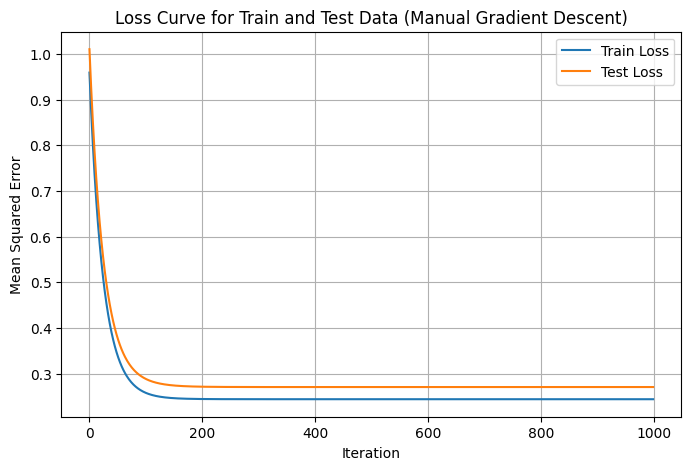

In [12]:
import matplotlib.pyplot as plt

# Re-initialize theta and lists to store loss values
theta = np.zeros((n, 1), dtype=float)
train_losses = []
test_losses = []

for i in range(n_iter):
    # Gradient step
    gradients = 2/m * X_train_np.T @ (X_train_np @ theta - y_train_np)
    theta -= alpha * gradients

    # Compute and store train and test loss
    train_loss = np.mean((X_train_np @ theta - y_train_np) ** 2)
    test_loss = np.mean((X_test_np @ theta - y_test_np) ** 2)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot the loss curves
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Loss Curve for Train and Test Data (Manual Gradient Descent)')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/dc/6rtlztbj1tq0t4yb63tgwm8w0000gn/T/ipykernel_17091/2747289823.py:8: RuntimeWarning: divide by zero encountered in matmul
  y_pred_manual = scaler_y.inverse_transform((X_plot @ theta).reshape(-1, 1)).flatten()
/var/folders/dc/6rtlztbj1tq0t4yb63tgwm8w0000gn/T/ipykernel_17091/2747289823.py:8: RuntimeWarning: overflow encountered in matmul
  y_pred_manual = scaler_y.inverse_transform((X_plot @ theta).reshape(-1, 1)).flatten()
/var/folders/dc/6rtlztbj1tq0t4yb63tgwm8w0000gn/T/ipykernel_17091/2747289823.py:8: RuntimeWarning: invalid value encountered in matmul
  y_pred_manual = scaler_y.inverse_transform((X_plot @ theta).reshape(-1, 1)).flatten()


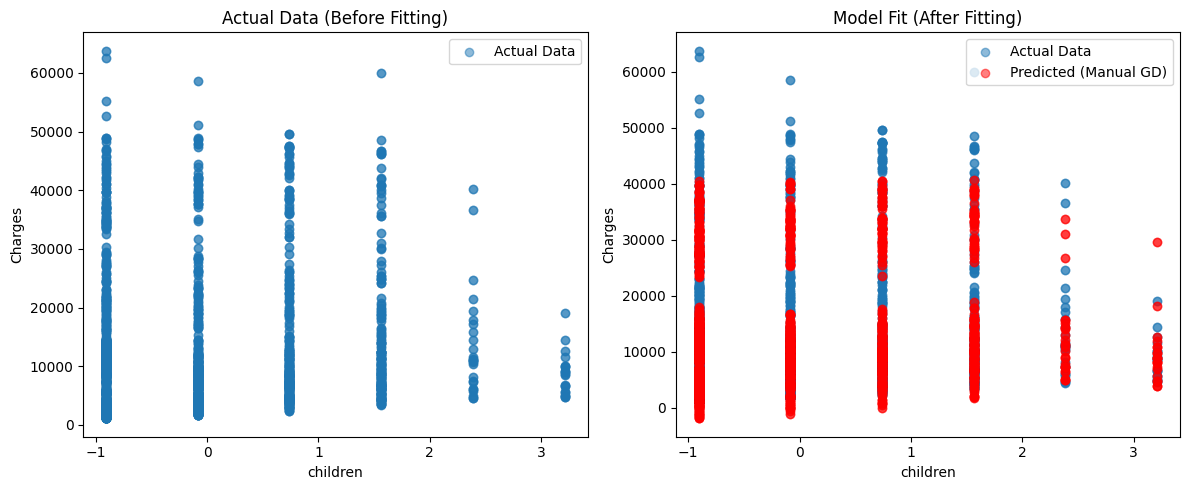

In [13]:
feature = 'children'

X_orig = df[feature]
y_orig = df['charges']

# Manual predictions 
X_plot = X_np
y_pred_manual = scaler_y.inverse_transform((X_plot @ theta).reshape(-1, 1)).flatten()

plt.figure(figsize=(12, 5))

# Scatter plot of actual data
plt.subplot(1, 2, 1)
plt.scatter(X_orig, y_orig, alpha=0.5, label='Actual Data')
plt.xlabel(feature)
plt.ylabel('Charges')
plt.title('Actual Data (Before Fitting)')
plt.legend()

# Scatter plot of predictions vs actual, with regression line
plt.subplot(1, 2, 2)
plt.scatter(X_orig, y_orig, alpha=0.5, label='Actual Data')
plt.scatter(X_orig, y_pred_manual, color='red', alpha=0.5, label='Predicted (Manual GD)')
plt.xlabel(feature)
plt.ylabel('Charges')
plt.title('Model Fit (After Fitting)')
plt.legend()

plt.tight_layout()
plt.show()

__Decision Tree Regressor__

A Decision Tree Regressor is a machine learning model that predicts a number  by learning simple decision rules from the data. It breaks the data into smaller pieces using simple rules, and then predicts the average value for each piece.

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Create and train the Decision Tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(X_test)


print("Decision Tree Regressor")
print("R^2 score:", r2_score(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))

Decision Tree Regressor
R^2 score: 0.9483749013797811
MSE: 7923469.550540412


__Random Forest Regressor__

A Random Forest Regressor is a machine learning model that predicts a number  by combining the results of many decision trees.
A decision tree is like a flowchart that makes decisions by asking a series of questions about the data.
A random forest builds lots of these trees (hundreds or more), each one a little different.
When you want to predict something, each tree gives its answer, and the random forest averages all the answers to get the final prediction.

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)


print("\nRandom Forest Regressor")
print("R^2 score:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest Regressor
R^2 score: 0.951532904052398
MSE: 7438776.277582585


## Comparing models

/Users/jade/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jade/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/jade/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


Model Comparison on Test Set
Linear Regression:  R^2 = 0.740,  MSE = 39933194.55
Decision Tree:      R^2 = 0.948,  MSE = 7923469.55
Random Forest:      R^2 = 0.952,  MSE = 7438776.28


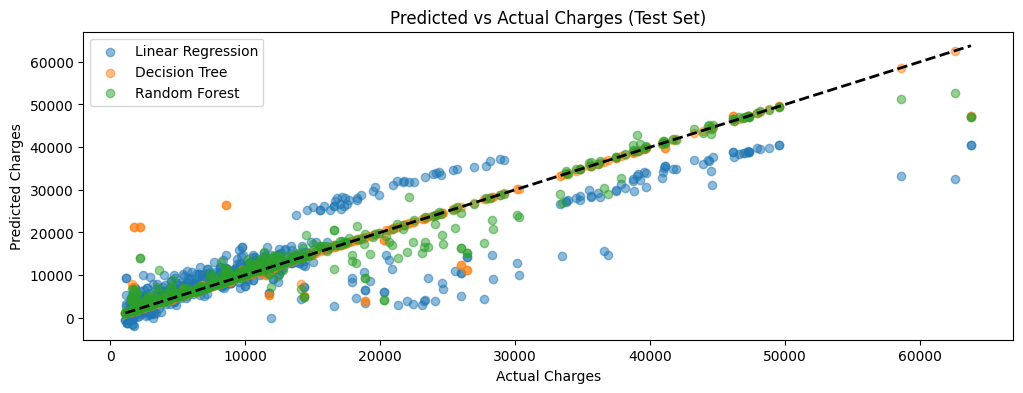

In [ ]:


# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Print R^2 and MSE for each model
print("Model Comparison on Test Set")
print(f"Linear Regression:  R^2 = {r2_score(y_test, y_pred_lr):.3f},  MSE = {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"Decision Tree:      R^2 = {r2_score(y_test, y_pred_dt):.3f},  MSE = {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"Random Forest:      R^2 = {r2_score(y_test, y_pred_rf):.3f},  MSE = {mean_squared_error(y_test, y_pred_rf):.2f}")

# Visual comparison
plt.figure(figsize=(12, 4))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_dt, alpha=0.5, label='Decision Tree')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Predicted vs Actual Charges (Test Set)')
plt.legend()
plt.show()

## Best performing model
The best performing model is the Random Forest Regressor. It combines the predictions of many decision trees, reducing overfitting and improving accuracy.
- The R² Score are higher for Random Forest(0.95) which means it explains about 95% of the variance in the test data. This is higher than both the Decision Tree (0.949) and Linear Regression (0.740).
- The Random Forest also has the lowest MSE (7,438,776.28), meaning its predictions are, on average, closer to the actual values than the other models.

__Save Random Forest__

 Using joblib which is a Python library used to save and load machine learning models and other large data objects efficiently.

In [17]:
import pickle

# Save the Random Forest model
filename = 'best_model.pkl'
with open(filename, 'wb') as f:
    pickle.dump(rf, f)
print("Best model (Random Forest) saved as 'best_model.pkl'")

Best model (Random Forest) saved as 'best_model.pkl'
